In [9]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from sklearn.manifold import TSNE


(1797, 64)


In [ ]:
def select_cols_(i: int) -> list[pl.Expr]:
    return list(map(lambda i: pl.col(f"column_{i}"), range(i)))


In [ ]:
data_path = Path()
df = pl.read_csv(data_path)
n_lf = 128
X = df.select(select_cols_(n_lf))
sample_nums = df.select(["dirname"]).to_numpy().flatten()


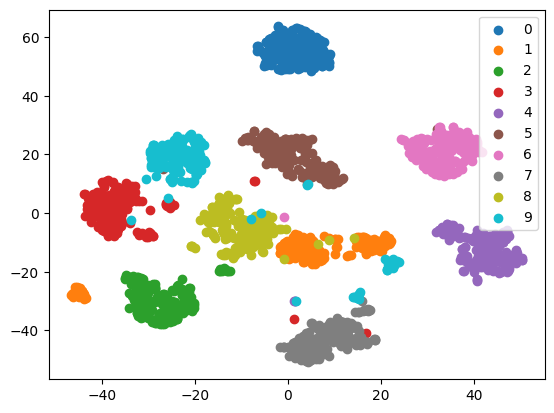

In [12]:
tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=0
)
X_emb = tsne.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for sample_num in np.unique(sample_nums):
    ax.scatter(X_emb[sample_nums==sample_num, 0], X_emb[sample_nums==sample_num, 1], label=sample_num)
ax.legend()
plt.show()
